### Import Library

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

### Read Datasest

In [16]:
data_dir = './dataset credit-approval/Datasets_Dummy_CreditApproval-v3.csv'
with open(data_dir, 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

ï»¿;approval;gender;usia;pinjaman;tenor;pemasukan;tanggungan;pekerjaan;donasi

Each data point looks like this:

0;N;M;53;1800000;6;1500000;1;Buruh;0



In [17]:
df  = pd.read_csv(data_dir, delimiter=';')
df.head()

Unnamed: 0 approval gender  usia  pinjaman  tenor  pemasukan  tanggungan  \
0           0        N      M    53   1800000      6    1500000           1   
1           1        Y      M    61    500000      4    3500000           0   
2           2        N      M    33   1000000      6    1200000           0   
3           3        N      M    37   1200000     16    1800000           5   
4           4        Y      F    36   1200000     10    4600000           1   

       pekerjaan  donasi  
0          Buruh       0  
1     Guru/Dosen       3  
2       Pedagang       6  
3  Pekerja Lepas       5  
4          Buruh       4

In [18]:
data = df.drop('Unnamed: 0', axis=1)
data.head()

approval gender  usia  pinjaman  tenor  pemasukan  tanggungan  \
0        N      M    53   1800000      6    1500000           1   
1        Y      M    61    500000      4    3500000           0   
2        N      M    33   1000000      6    1200000           0   
3        N      M    37   1200000     16    1800000           5   
4        Y      F    36   1200000     10    4600000           1   

       pekerjaan  donasi  
0          Buruh       0  
1     Guru/Dosen       3  
2       Pedagang       6  
3  Pekerja Lepas       5  
4          Buruh       4

## Data Preprocessing

### Convert Categorical to Numeric Value

In [19]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(data[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        data.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [20]:
categorical_features = ['approval', 'gender','pekerjaan']
Cat_to_Num(categorical_features)

approval --> {'N': 0, 'Y': 1}
gender --> {'F': 0, 'M': 1}
pekerjaan --> {'Buruh': 0, 'Guru/Dosen': 1, 'Pedagang': 2, 'Pekerja Lepas': 3, 'Wirausaha': 4}


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   approval    10000 non-null  int64
 1   gender      10000 non-null  int64
 2   usia        10000 non-null  int64
 3   pinjaman    10000 non-null  int64
 4   tenor       10000 non-null  int64
 5   pemasukan   10000 non-null  int64
 6   tanggungan  10000 non-null  int64
 7   pekerjaan   10000 non-null  int64
 8   donasi      10000 non-null  int64
dtypes: int64(9)
memory usage: 703.2 KB


### Splitting labels and features

In [22]:
labels = data['approval']
features = data.drop('approval', axis=1)

In [23]:
col_features = ['gender', 'usia', 'pinjaman', 'tenor', 'pemasukan', 'tanggungan', 'pekerjaan', 'donasi']

features[col_features] = features[col_features].astype('int64')

In [24]:
features.head(5)

gender  usia  pinjaman  tenor  pemasukan  tanggungan  pekerjaan  donasi
0       1    53   1800000      6    1500000           1          0       0
1       1    61    500000      4    3500000           0          1       3
2       1    33   1000000      6    1200000           0          2       6
3       1    37   1200000     16    1800000           5          3       5
4       0    36   1200000     10    4600000           1          0       4

### Normalize Data

In [25]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

In [26]:
col_features = ['gender', 'usia', 'pinjaman', 'tenor', 'pemasukan', 
                'tanggungan', 'pekerjaan', 'donasi']

features[col_features] = mx.fit_transform(features[col_features])
features.head(5)

gender    usia  pinjaman     tenor  pemasukan  tanggungan  pekerjaan  \
0     1.0  0.4125      0.52  0.176471   0.078947         0.2       0.00   
1     1.0  0.5125      0.00  0.058824   0.605263         0.0       0.25   
2     1.0  0.1625      0.20  0.176471   0.000000         0.0       0.50   
3     1.0  0.2125      0.28  0.764706   0.157895         1.0       0.75   
4     0.0  0.2000      0.28  0.411765   0.894737         0.2       0.00   

   donasi  
0   0.000  
1   0.375  
2   0.750  
3   0.625  
4   0.500

### Train & Test split

In [27]:
X_train, X_validate, y_train, y_validate = train_test_split(
    features, labels, test_size=0.3, shuffle=True, stratify=labels, random_state=42)

# % of training set
len(X_train)/len(features)

0.7

In [28]:
X_train.head()

gender    usia  pinjaman     tenor  pemasukan  tanggungan  pekerjaan  \
2345     1.0  0.7250      0.56  0.411765   0.210526         0.0       0.50   
9346     1.0  0.9000      0.36  0.529412   0.078947         0.4       0.25   
138      0.0  0.9250      0.08  0.176471   0.000000         1.0       0.50   
1967     0.0  0.7375      0.36  0.294118   0.000000         0.4       0.25   
4148     0.0  0.8125      0.40  0.411765   0.342105         0.4       0.25   

      donasi  
2345   0.250  
9346   0.375  
138    0.125  
1967   0.625  
4148   0.125

In [29]:
X_train = np.array(X_train, dtype='float32')
X_validate = np.array(X_validate, dtype='float32')

y_train = np.array(y_train, dtype='float32')
y_validate = np.array(y_validate, dtype='float32')

In [30]:
print(y_train.shape, y_validate.shape)
print(y_train.shape, y_validate.shape)

(7000,) (3000,)
(7000,) (3000,)


## Create TF Model

In [31]:
def create_model():
    
    model = tf.keras.Sequential([
        # tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(8, activation="relu", input_shape=X_train[0].shape),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                  metrics=['accuracy'])


    return model

In [32]:
mc = ModelCheckpoint('creditapproval_model_v3_02.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [33]:
model = create_model()

history = model.fit(X_train, y_train, 
                    epochs=300, 
                    batch_size = 32,
                    callbacks = [mc],
                    validation_data=(X_validate, y_validate))

Epoch 1/300
216/219 [============================>.] - ETA: 0s - loss: 0.7351 - accuracy: 0.4638
Epoch 1: val_accuracy improved from -inf to 0.49000, saving model to creditapproval_model_v3_02.h5
219/219 [==============================] - 3s 4ms/step - loss: 0.7351 - accuracy: 0.4633 - val_loss: 0.7103 - val_accuracy: 0.4900
Epoch 2/300
215/219 [============================>.] - ETA: 0s - loss: 0.6956 - accuracy: 0.5365
Epoch 2: val_accuracy improved from 0.49000 to 0.56133, saving model to creditapproval_model_v3_02.h5
219/219 [==============================] - 1s 3ms/step - loss: 0.6953 - accuracy: 0.5379 - val_loss: 0.6845 - val_accuracy: 0.5613
Epoch 3/300
208/219 [===========================>..] - ETA: 0s - loss: 0.6738 - accuracy: 0.5879
Epoch 3: val_accuracy improved from 0.56133 to 0.61467, saving model to creditapproval_model_v3_02.h5
219/219 [==============================] - 1s 3ms/step - loss: 0.6731 - accuracy: 0.5896 - val_loss: 0.6632 - val_accuracy: 0.6147
Epoch 4/300
2

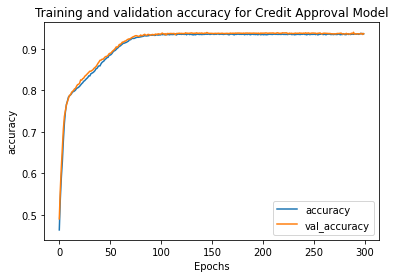

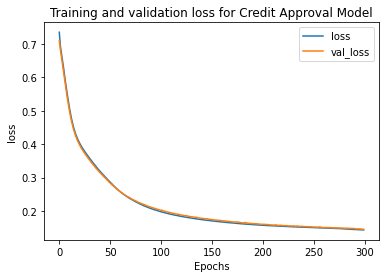

In [35]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.title(f'Training and validation {metric} for Credit Approval Model')
    plt.show()
    
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [36]:
final_model = tf.keras.models.load_model('./creditapproval_model_v3_02.h5')
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


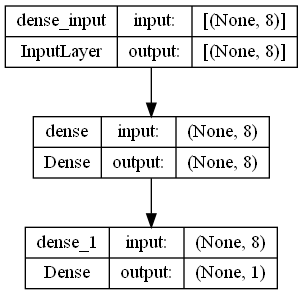

In [54]:
tf.keras.utils.plot_model(final_model, show_shapes=True)

In [37]:
scores = []
score = final_model.evaluate(X_validate, y_validate, verbose = 1)

akurasi = score[1]
scores.append(akurasi)
y_pred = final_model.predict(X_validate)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_validate, y_pred)

print(cm)
print(classification_report(y_validate,y_pred))

def Average(lst):
 return sum(lst) / len(lst)

print(Average(scores))


94/94 [==============================] - 0s 1ms/step
[[1340   80]
 [  99 1481]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      1420
         1.0       0.95      0.94      0.94      1580

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000

0.9403333067893982


[Text(0, 0.5, 'bad-credit'), Text(0, 1.5, 'good-credit')]

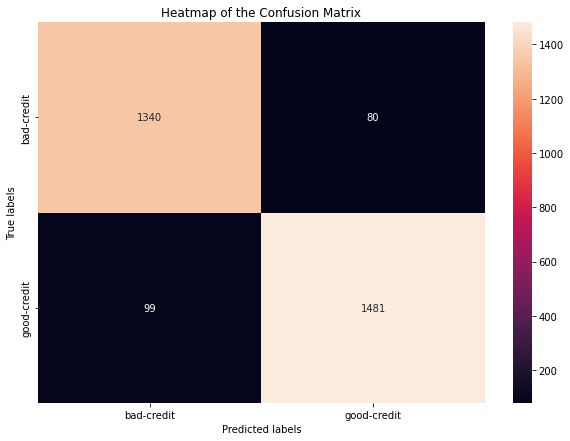

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt     

target_names = ['bad-credit','good-credit']

fig,ax=plt.subplots(1,1,
                    figsize=(10,7)
                   )

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Heatmap of the Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names)

### Test Prediction Output

In [39]:
predictions = final_model.predict(features)

313/313 [==============================] - 0s 1ms/step


In [41]:
print(data[10:11])
print(features[10:11])
print(predictions[10])
print('predicted label: ', np.round(predictions[10]))
print('actual label: ', labels[10])

    approval  gender  usia  pinjaman  tenor  pemasukan  tanggungan  pekerjaan  \
10         1       1    31   1000000     16    5000000           5          2   

    donasi  
10       5  
    gender    usia  pinjaman     tenor  pemasukan  tanggungan  pekerjaan  \
10     1.0  0.1375       0.2  0.764706        1.0         1.0        0.5   

    donasi  
10   0.625  
[0.9842455]
predicted label:  [1.]
actual label:  1


## Convert Model .h5 to TFLite

In [42]:
final_model = tf.keras.models.load_model('./creditapproval_model_v3_02.h5')

# Check its architecture
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [43]:
from keras.models import load_model
saved_model = load_model('creditapproval_model_v3_02.h5')
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = saved_model.evaluate(X_validate, y_validate, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.939, Valid: 0.940


In [44]:
import tempfile
import os

MODEL_DIR = './exp_creditapproval_model_v3_02'

# version = 2

# export_path = os.path.join(MODEL_DIR, str(version))
export_path = os.path.join(MODEL_DIR)

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: ./exp_creditapproval_model_v3_02\assets

export_path = ./exp_creditapproval_model_v3_02


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'creditapproval_model_v3_02.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

label_types = ['Bad Credit', 'Good Credit']
with open('creditapproval_model_v3_02.txt', 'w') as f:
    f.write('\n'.join(label_types))

## Load & Test TFLite model

Load TensorFlow lite model with interpreter interface.

In [46]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="creditapproval_model_v3_02.tflite")
# interpreter = tf.lite.Interpreter(model_path="regression.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

[{'name': 'serving_default_dense_input:0',
  'index': 0,
  'shape': array([1, 8]),
  'shape_signature': array([-1,  8]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [47]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 7,
  'shape': array([1, 1]),
  'shape_signature': array([-1,  1]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [48]:
np_res_im = np.array(X_validate[1])
np_res_im = (np_res_im).astype('float32')
np_res_im

array([1.        , 0.3       , 0.2       , 0.4117647 , 0.21052632,
       1.        , 0.5       , 0.        ], dtype=float32)

In [49]:
print(input_details[0]['shape'])
print(np_res_im.shape)

[1 8]
(8,)


In [50]:
if len(np_res_im.shape) == 1:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])

In [51]:
print(np_res_im.shape)
print(output_data.shape)

(1, 8)
(1, 1)


In [53]:
predictions = final_model.predict(X_validate)
print(X_validate[1])
print('actual labels: ' + str(y_validate[1]))
print('prediction from model.h5: ' + str(predictions[1]))
print('prediction from model.tflite: ' + str(output_data))

94/94 [==============================] - 0s 2ms/step
[1.         0.3        0.2        0.4117647  0.21052632 1.
 0.5        0.        ]
actual labels: 0.0
prediction from model.h5: [0.02250416]
prediction from model.tflite: [[0.02130494]]
